<a href="https://colab.research.google.com/github/HaHyunkyung/Seoul_bus_station/blob/main/2_%EA%B5%AC%EB%B3%84_%EC%9C%A0%EB%8F%99%EC%9D%B8%EA%B5%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 생활정보 기반 대중교통 수요 분석

<center>
<img src='https://drive.google.com/uc?id=1Nf_jhqGMXA8eRFVe0PbJXzkk1d6SbZK8' /></br>
</center>

---

# 목차
#### 1. 구별 버스정류장 분석
## 2. 구별 유동 인구 분석 ✔
#### 3. 구별 주민등록인구 분석
#### 4. 구별 업종 등록 분석

In [ ]:
 %pip install pandas seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[기본 데이터]
* seoul_moving_month_202401.csv

[데이터 소개]
* 서울 시 구별 이동 2024년 1월 데이터
* https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기

In [ ]:
import pandas as pd
seoul_moving = pd.read_csv('/content/drive/MyDrive/[KT] 서울시 생활정보 기반 대중교통 수요 분석/실습/1.2 seoul_moving_month_202401.csv',sep=",", encoding = 'UTF-8')

In [ ]:
seoul_moving.shape

(29361031, 10)

---

# 2.기본 정보 확인 및 클렌징

#### 기본 정보 확인하기

In [ ]:
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,29361031.0,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07
mean,202401.0,1.362194e+01,1.710538e+04,1.718123e+04,4.285979e+01,9.366626e+01
std,0.0,5.835017e+00,9.024981e+03,9.037102e+03,1.799456e+01,7.803316e+01
min,202401.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+00
25%,202401.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,4.900000e+01
50%,202401.0,1.400000e+01,1.120000e+04,1.120000e+04,4.000000e+01,7.400000e+01
75%,202401.0,1.800000e+01,3.101400e+04,3.101400e+04,5.500000e+01,1.120000e+02
max,202401.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,4.462000e+03


In [ ]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [ ]:
display(seoul_moving.head())
display(seoul_moving.tail())

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
29361026,202401,토,23,39000,11250,M,35,EH,229,*
29361027,202401,토,23,39000,11250,M,40,EW,295,*
29361028,202401,토,23,39000,11250,M,45,EH,323,9.47
29361029,202401,토,23,39000,11250,M,50,EH,184,3.28
29361030,202401,토,23,39000,11250,M,55,EH,307,6.56


* 1번 열의 의미
    * " 2024년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 E(기타)로 이동한 10 ~ 15세 여성은 총 11.96명이며 이들의 평균 이동시간은 167분이다


#### 결측치 처리

* '이동인구(합)' column은 이동 인구의 합산인데 object 타입

    - 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리
    - 3명 미만의 이동인구는 * 처리 되어 있어서 해당 값을 중위값으로 변경
    - '이동인구(합)' 컬럼의 데이터 타입을 수치형으로 변경

In [ ]:
seoul_moving['이동인구(합)'].value_counts()

,count
이동인구(합),
*,3870174
6.05,420734
3.30,397265
3.29,286071
3.31,234821
...,...
1617.95,1
2414.11,1
1499.98,1


In [ ]:
# '*' 값의 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체 (1.5명)

seoul_moving.replace("*","1.5", inplace = True)
seoul_moving['이동인구(합)'].value_counts()

,count
이동인구(합),
1.5,3870174
6.05,420734
3.30,397265
3.29,286071
3.31,234821
...,...
1617.95,1
2414.11,1
1499.98,1


In [ ]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [ ]:
# 이동인구(합) column의 데이터 타입 변경
seoul_moving = seoul_moving.astype({'이동인구(합)':'float'})
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.2+ GB


#### 이동유형, 요일, 성별 변수의 value수를 파악

In [ ]:
seoul_moving['이동유형'].value_counts()

,count
이동유형,
EH,5947038
HE,5585412
EE,5224553
WH,3078348
WE,2759477
HW,2700535
EW,2330931
WW,1082641
HH,652096


In [ ]:
seoul_moving['요일'].value_counts()

,count
요일,
월,4448237
수,4341429
화,4300070
토,4254525
금,4251430
목,4005959
일,3759381


* 24년 1월의 요일 수
    * 일 : 4, 월 : 5, 화 : 5, 수 : 5, 목 : 4, 금 : 4, 토 : 4

In [ ]:
seoul_moving['성별'].value_counts()

,count
성별,
M,16433525
F,12927506


#### 심야 이동이 가장 많은 요일

In [ ]:
# 새벽 5시까지 도착하는 이동 사례, seoul_moving_night 변수 저장
seoul_moving_night = seoul_moving[seoul_moving['도착시간']<=5]
seoul_moving_night['요일'].value_counts()

,count
요일,
토,447240
월,439563
수,414321
화,403295
금,397406
일,387318
목,379779


#### 서울 지역의 데이터만 추출.

* 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31)

* 출발과 도착이 모두 서울인 데이터만 추출

In [ ]:
seoul_moving = seoul_moving[(seoul_moving["출발 시군구 코드"] < 20000) & (seoul_moving["도착 시군구 코드"] < 20000)]

In [ ]:
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90
...,...,...,...,...,...,...,...,...,...,...
29320192,202401,토,23,11250,11250,M,80,EH,18,28.41
29320193,202401,토,23,11250,11250,M,80,HE,78,9.46
29320194,202401,토,23,11250,11250,M,80,HW,168,9.48
29320195,202401,토,23,11250,11250,M,80,WH,16,47.27


#### 서울지역의 구 별로 groupby하여 데이터를 확인 (유동인구 기준)

* 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [ ]:
# 유출이 가장 많은 구와 적은 구
seoul_moving.groupby(by = ['출발 시군구 코드'], as_index = False)['이동인구(합)'].sum()

,출발 시군구 코드,이동인구(합)
0,11010,20381157.61
1,11020,21663423.16
2,11030,15375476.83
3,11040,18109271.88
4,11050,18498149.47
5,11060,17602800.50
6,11070,14829071.02
7,11080,19177348.09
8,11090,13058060.56
9,11100,11426560.21


* 강남구와 금천구가 유출이 가장 많음

In [ ]:
# 유입이 제일 많은 구와 적은 구
seoul_moving.groupby(by=['도착 시군구 코드'], as_index=False)["이동인구(합)"].sum()

,도착 시군구 코드,이동인구(합)
0,11010,20258827.46
1,11020,21692705.49
2,11030,15506848.68
3,11040,18069555.27
4,11050,18517366.67
5,11060,17639877.61
6,11070,14845861.77
7,11080,19154699.51
8,11090,13050239.21
9,11100,11425008.61


* 강남구와 금천구가 유입이 가장 많음



#### 심야버스 제외(낮 시간만)

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [ ]:
seoul_moving = seoul_moving[seoul_moving['도착시간'] >= 5]
seoul_moving.reset_index(drop=True, inplace=True)
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,5,11010,11010,F,0,HE,54,28.28
1,202401,일,5,11010,11010,F,0,HW,30,28.03
2,202401,일,5,11010,11010,F,10,EE,54,6.00
3,202401,일,5,11010,11010,F,10,HE,13,5.82
4,202401,일,5,11010,11010,F,15,EH,44,12.22
...,...,...,...,...,...,...,...,...,...,...
9656715,202401,토,23,11250,11250,M,80,EH,18,28.41
9656716,202401,토,23,11250,11250,M,80,HE,78,9.46
9656717,202401,토,23,11250,11250,M,80,HW,168,9.48
9656718,202401,토,23,11250,11250,M,80,WH,16,47.27


* '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합 구함.

In [ ]:
# 평균을 구해서 df_mean 변수로 저장
df_mean = seoul_moving.groupby(by=['도착 시군구 코드'], as_index=False)[['평균 이동 시간(분)','이동인구(합)']].mean()
df_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,59.819645,44.694476
1,11020,58.197800,47.183639
2,11030,57.995736,36.418986
3,11040,58.184820,41.879404
4,11050,60.890991,45.669953
5,11060,59.944131,40.631885
6,11070,63.727215,41.653042
7,11080,59.871429,44.970384
8,11090,65.100321,39.190099
9,11100,66.744401,38.268616


In [ ]:
# 합을 구해서 df_sum 변수로 저장
# 평균이동시간(분) -> 총 이동 시간, 이동인구(합) -> 총 이동인구로 이름 대체
df_sum = seoul_moving.groupby(by=['도착 시군구 코드'], as_index=False)[['평균 이동 시간(분)','이동인구(합)']].sum()
df_sum.rename(columns={'평균 이동 시간(분)':'총 이동 시간','이동인구(합)':'총 이동인구'},inplace=True)
df_sum

,도착 시군구 코드,총 이동 시간,총 이동인구
0,11010,26504649,19803049.50
1,11020,26065980,21132891.17
2,11030,23776976,14930983.13
3,11040,24144722,17378528.65
4,11050,23556776,17668243.56
5,11060,24882389,16866011.11
6,11070,21685479,14173946.94
7,11080,24434129,18352863.32
8,11090,20733085,12481223.62
9,11100,19132149,10969622.19


In [ ]:
# df_mean,df_sum 파일 합치기
df_seoul_moving = pd.merge(df_mean,df_sum,how='inner', on='도착 시군구 코드')

In [ ]:
df_seoul_moving.to_csv("df_seoul_moving.csv", index = False)

---

# 3.데이터 분석하기


In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


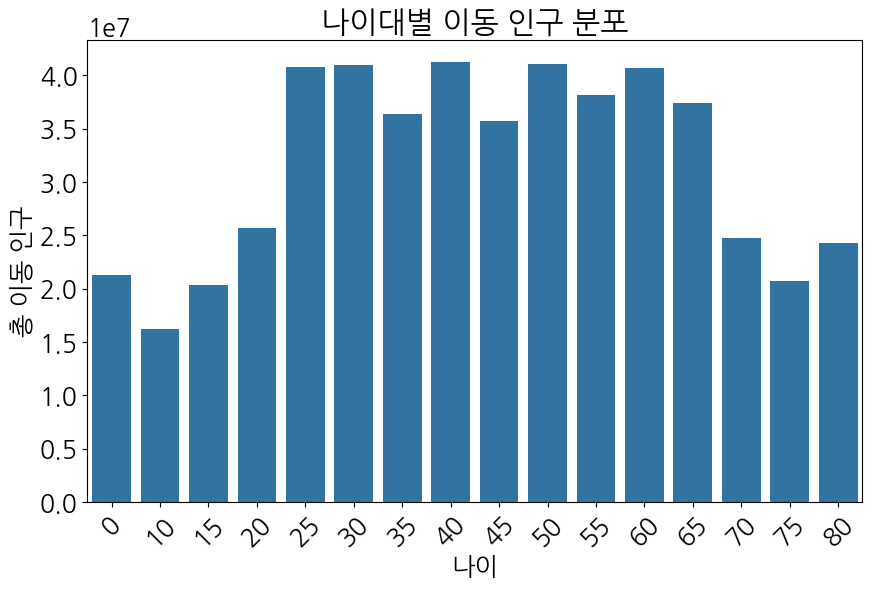

In [ ]:
# 나이대별 이동 인구 분포
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='나이', y='이동인구(합)', data=seoul_moving, estimator=sum, errorbar=None)
plt.title('나이대별 이동 인구 분포')
plt.xlabel('나이')
plt.ylabel('총 이동 인구')
plt.xticks(rotation=45)
plt.show()

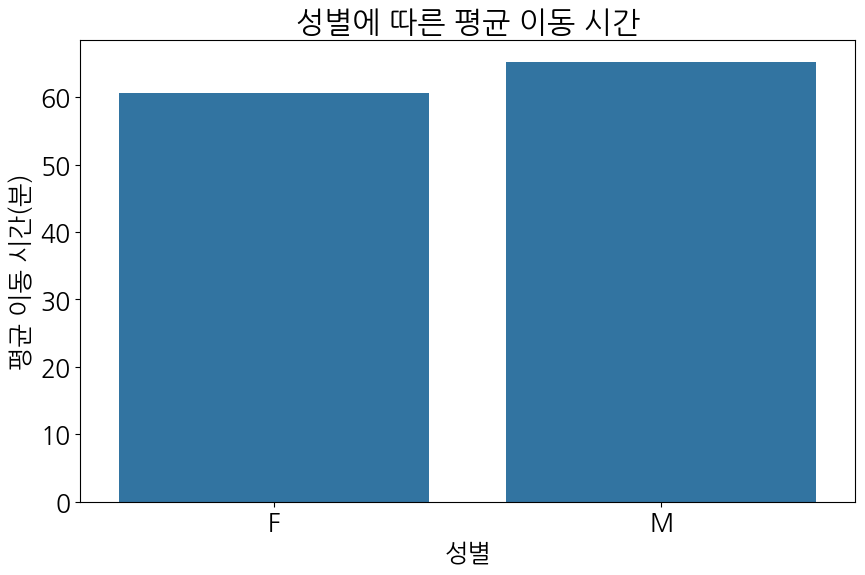

In [ ]:
# 성별에 따른 평균 이동 시간
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # NumPy 라이브러리를 불러옵니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='성별', y='평균 이동 시간(분)', data=seoul_moving, estimator=np.mean, errorbar=None)  # np.mean 사용
plt.title('성별에 따른 평균 이동 시간')
plt.xlabel('성별')
plt.ylabel('평균 이동 시간(분)')
plt.show()

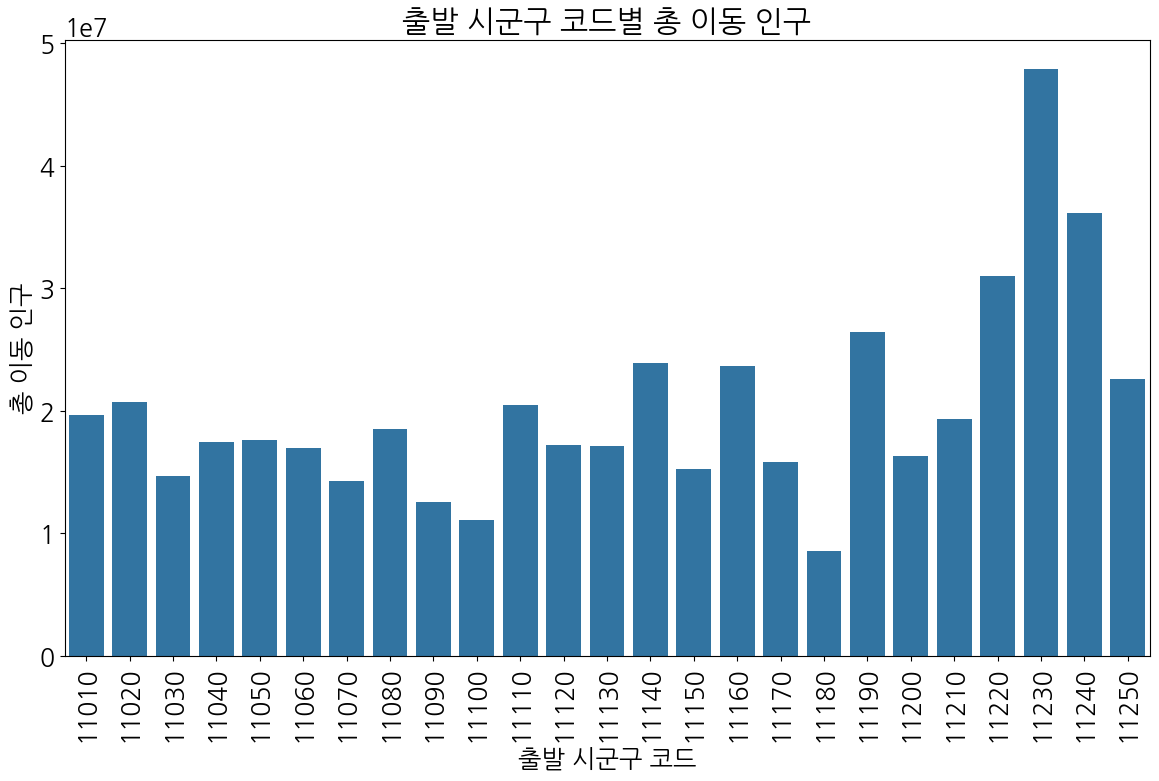

In [ ]:
# 출발 시군구 코드별 총 이동 인구
plt.figure(figsize=(14, 8))
seoul_moving_grouped = seoul_moving.groupby('출발 시군구 코드', as_index=False)['이동인구(합)'].sum()
sns.barplot(x='출발 시군구 코드', y='이동인구(합)', data=seoul_moving_grouped, errorbar=None)
plt.title('출발 시군구 코드별 총 이동 인구')
plt.xlabel('출발 시군구 코드')
plt.ylabel('총 이동 인구')
plt.xticks(rotation=90)
plt.show()

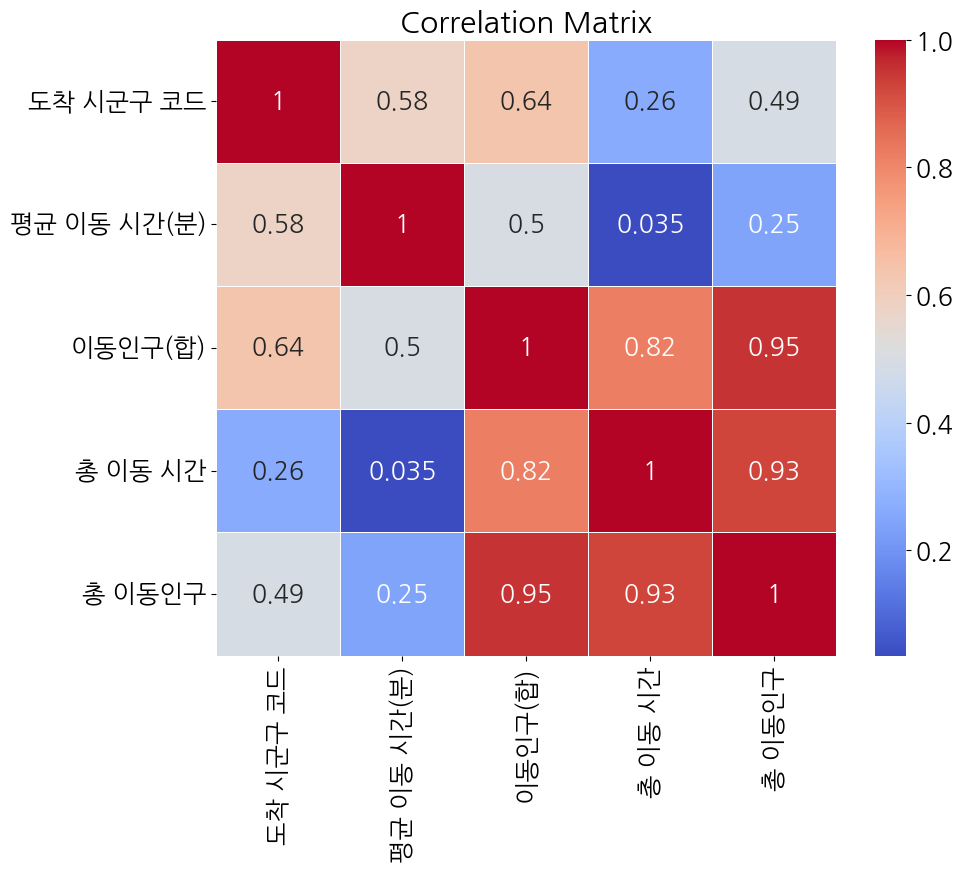

In [ ]:
corr_matrix =  df_seoul_moving.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### **1. 이동인구와 총 이동 시간의 강한 상관 관계**

이동인구(합)와 총 이동 시간 간의 상관 계수가 0.82로 나타났다. 이는 이동인구가 많아질수록 총 이동 시간이 증가하는 경향이 있음을 시사한다. 이러한 경향은 인구 밀도가 높은 지역에서 교통 혼잡이 발생할 가능성을 나타내며, 교통 체증 문제를 해결하기 위한 정책적 접근이 필요함을 강조한다.

#### **2. 이동인구와 총 이동인구 간의 높은 상관 관계**

이동인구(합)와 총 이동인구 간의 상관 계수가 0.95로 나타났다. 이는 이동인구 데이터를 통해 총 이동인구를 예측할 수 있는 가능성을 제시하며, 정책 입안자들이 이동 패턴을 이해하는 데 큰 도움이 될 수 있다.

#### **3. 평균 이동 시간과 이동인구 간의 중간 정도의 상관 관계**

평균 이동 시간(분)과 이동인구(합) 간의 상관 계수가 0.5로 나타났다. 이는 평균 이동 시간이 길어질수록 이동인구도 증가하는 경향이 있음을 나타내지만, 그 관계는 상대적으로 약하다. 이는 특정 시간대에 이동이 집중되는 현상이나 특정 요인(예: 교통사고, 날씨 등)으로 인해 이동 시간이 영향을 받을 수 있음을 시사한다.


#### **4.총 이동 시간과 총 이동인구 간의 강한 상관 관계**

총 이동 시간과 총 이동인구 간의 상관 계수는 0.93으로, 두 변수 간의 상관 관계가 매우 강함을 보여준다. 이는 교통량이 많을수록 총 이동 시간도 증가함을 의미하며, 이를 통해 교통 체계의 효율성을 높이기 위한 개선이 필요함을 알 수 있다.

#### **5.시군구 코드와 이동인구 간의 관계**

도착 시군구 코드와 이동인구(합) 간의 상관 계수가 0.64로 나타났다. 이는 특정 지역에 대한 이동 패턴이 존재함을 시사한다. 따라서 지역별 맞춤형 교통 정책이나 인프라 개선이 필요할 수 있으며, 각 시군구의 특성을 반영한 교통 계획이 요구됩니다.

---